In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_regression,make_circles,make_s_curve
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import decomposition
from factor_analyzer import FactorAnalyzer

In [2]:
data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.NaN)
data=data.dropna()
X=data.iloc[:,3:-1]
print(X.columns)
fa = FactorAnalyzer(method='principal',n_factors=2,rotation='varimax')
fa.fit(X)
print("因子载荷矩阵\n",fa.loadings_)
print("变量共同度:\n", fa.get_communalities())
tmp=fa.get_factor_variance()
print("因子的方差贡献:{0}".format(tmp[0]))
print("因子的方差贡献率:{0}".format(tmp[1]))
print("因子的累计方差贡献率:{0}".format(tmp[2]))

Index(['PM2.5', 'PM10', 'SO2', 'CO', 'NO2'], dtype='object')
因子载荷矩阵
 [[0.92306469 0.26660449]
 [0.90247854 0.2290372 ]
 [0.30642648 0.9405462 ]
 [0.80663485 0.4434194 ]
 [0.78510676 0.44600552]]
变量共同度:
 [0.92312638 0.86692555 0.97852435 0.84728055 0.81531355]
因子的方差贡献:[3.02746554 1.40370484]
因子的方差贡献率:[0.60549311 0.28074097]
因子的累计方差贡献率:[0.60549311 0.88623408]


代码说明：
（1）第1至3行：读入空气质量监测数据。数据预处理。
（2）第4，5行：确定和输出参与因子分析的变量：PM2.5,PM10,SO2,CO,NO2浓度数据。
（3）第6，7行：采用基于主成分分析的因子分析，提取2个因子并利用方差极大法旋转因子载荷矩阵。
（4）第8，9行：输出旋转后的因子载荷矩阵和5种污染物浓度变量的变量共同度。
结果表明：因子f_1与PM2.5,PM10,CO,NO2有较高的相关性，因子f_2与SO2高相关。变量的共同度均高于0.82，整体上各变量的信息丢失较少。
（5）第10，13行：输出因子方差贡献、方差贡献率和累计方差贡献率。累计方差贡献率达到88%，因子分析效果比较理想。

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3,score
54,2014-02-24,310.0,严重污染,260.0,327.0,133.0,4.7,119.0,19.0,5.520231
53,2014-02-23,261.0,重度污染,211.0,246.0,130.0,3.6,92.0,14.0,5.028838
22,2014-01-23,271.0,重度污染,221.0,263.0,118.0,4.0,125.0,8.0,4.889097
15,2014-01-16,402.0,严重污染,353.0,384.0,109.0,4.6,123.0,20.0,4.726350
45,2014-02-15,428.0,严重污染,393.0,449.0,100.0,3.8,110.0,25.0,4.215185


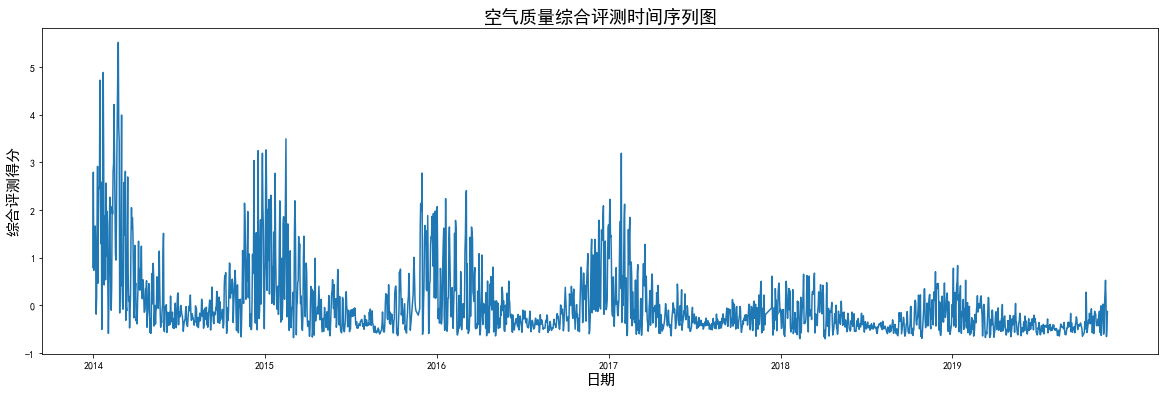

In [3]:
y=fa.transform(X)
data['score']=y[:,0]*tmp[2][0]/sum(tmp[2])+y[:,1]*tmp[2][1]/sum(tmp[2])
plt.figure(figsize=(20,6))
plt.plot(data['score'])
plt.title("空气质量综合评测时间序列图",fontsize=18)
plt.xlabel("日期",fontsize=15)
plt.ylabel("综合评测得分",fontsize=15)
plt.xticks([1,365,365*2,365*3,365*4,365*5],['2014','2015','2016','2017','2018','2019'])
id=argsort(data['score'])
data.iloc[id[::-1][0:5],]

代码说明：
（1）第1行：得到因子得分。
（2）第2行：计算空气质量综合评测结果。
（3）第3至8行：绘制空气质量综合评测结果的时间序列图。
